In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
II. Data Understanding</p><br>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Load a Dataframe:</p><br>

In [25]:
train = pd.read_csv('KDDTrain+.txt')
test = pd.read_csv('KDDTest+.txt')

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Informations sur dataset</p><br>

In [26]:
train.head(8)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21


In [27]:
test.head(8)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21


In [28]:
train.tail()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [29]:
test.tail()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21
22542,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14


In [30]:
# ajout nom des column
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
train.columns=column_names
test.columns=column_names

In [31]:
print("Taille initial du dataset train :",train.shape)
print("Taille initial du dataset train :",test.shape)

Taille initial du dataset train : (125972, 43)
Taille initial du dataset train : (22543, 43)


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    la plupart des column sont de type quantitatif ( 'int64' ou 'float64' ) 
Les columns qualitative de type objet incluent probablement des informations telles que le type 
de protocole (protocol_type), le service (service), le drapeau (flag), et le type d'attaque (attack). <br>
La variable cible de notre ensemble de données semble être la colonne attack, qui vas être utilisée 
dans des tâches de classification pour prédire le type d'attaque associé à chaque entrée.
    </div>

In [33]:
# Statistiques descriptives sur le data
print(train.describe())


            duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

In [34]:
train.describe(include="object")

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>
count : Le nombre d'entrées non nulles dans la colonne. <br>

unique : Le nombre de catégories uniques dans la colonne <br>
top : La catégorie la plus fréquente <br>
freq : Le nombre d'occurrences de la catégorie la plus fréquente <br>
</div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
Les valeurs uniques pour chaque colonne</p><br>

In [35]:
# affichage des valeurs pour chaque colonne
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne duration: [    0  5607   507 ...  5430 11680   679]
Valeurs uniques pour la colonne protocol_type: ['udp' 'tcp' 'icmp']
Valeurs uniques pour la colonne service: ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Valeurs uniques pour la colonne flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Valeurs uniques pour la colonne src_bytes: [  146     0   232 ...  2816 11466  235

In [36]:
nombre_valeurs_uniques_par_colonne = train.nunique()
colonnes_avec_une_seule_valeur = nombre_valeurs_uniques_par_colonne[nombre_valeurs_uniques_par_colonne == 1].index
print("Colonnes avec une seule valeur unique :")
print(colonnes_avec_une_seule_valeur)


Colonnes avec une seule valeur unique :
Index(['num_outbound_cmds'], dtype='object')


In [37]:
train = train.drop('num_outbound_cmds', axis=1)
test = test.drop('num_outbound_cmds', axis=1)
train = train.drop('level', axis=1)
test = test.drop('level', axis=1)


<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Vérification de l'équilibrage du notre dataset:</p><br>

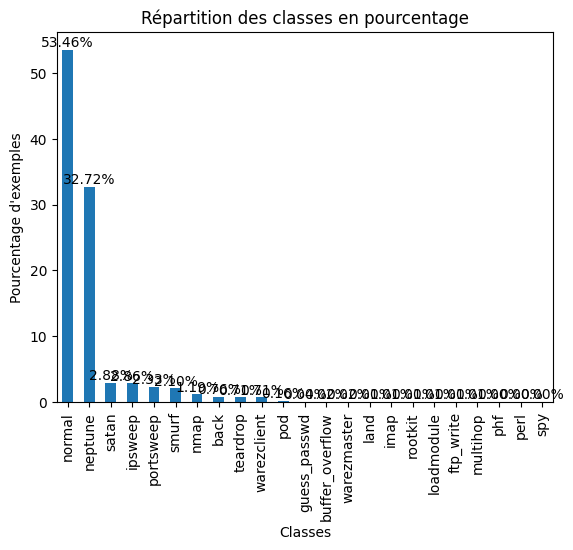

In [38]:
class_counts = train['attack'].value_counts()
class_percentages = (class_counts / len(train)) * 100
ax = class_percentages.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    la distribution des étiquettes de la variable cible 'attack' montre que la classe 'normal' est significativement 
prédominante, représentant environ 53,46% de l'ensemble de données.  <br>
Les autres classes d'attaques ont des pourcentages beaucoup plus faibles, avec des variations allant de 32,47% 
à seulement 0,01%. <br>
    Cette observation suggère un déséquilibre marqué dans les classes de notre ensemble de données. 
    </div>

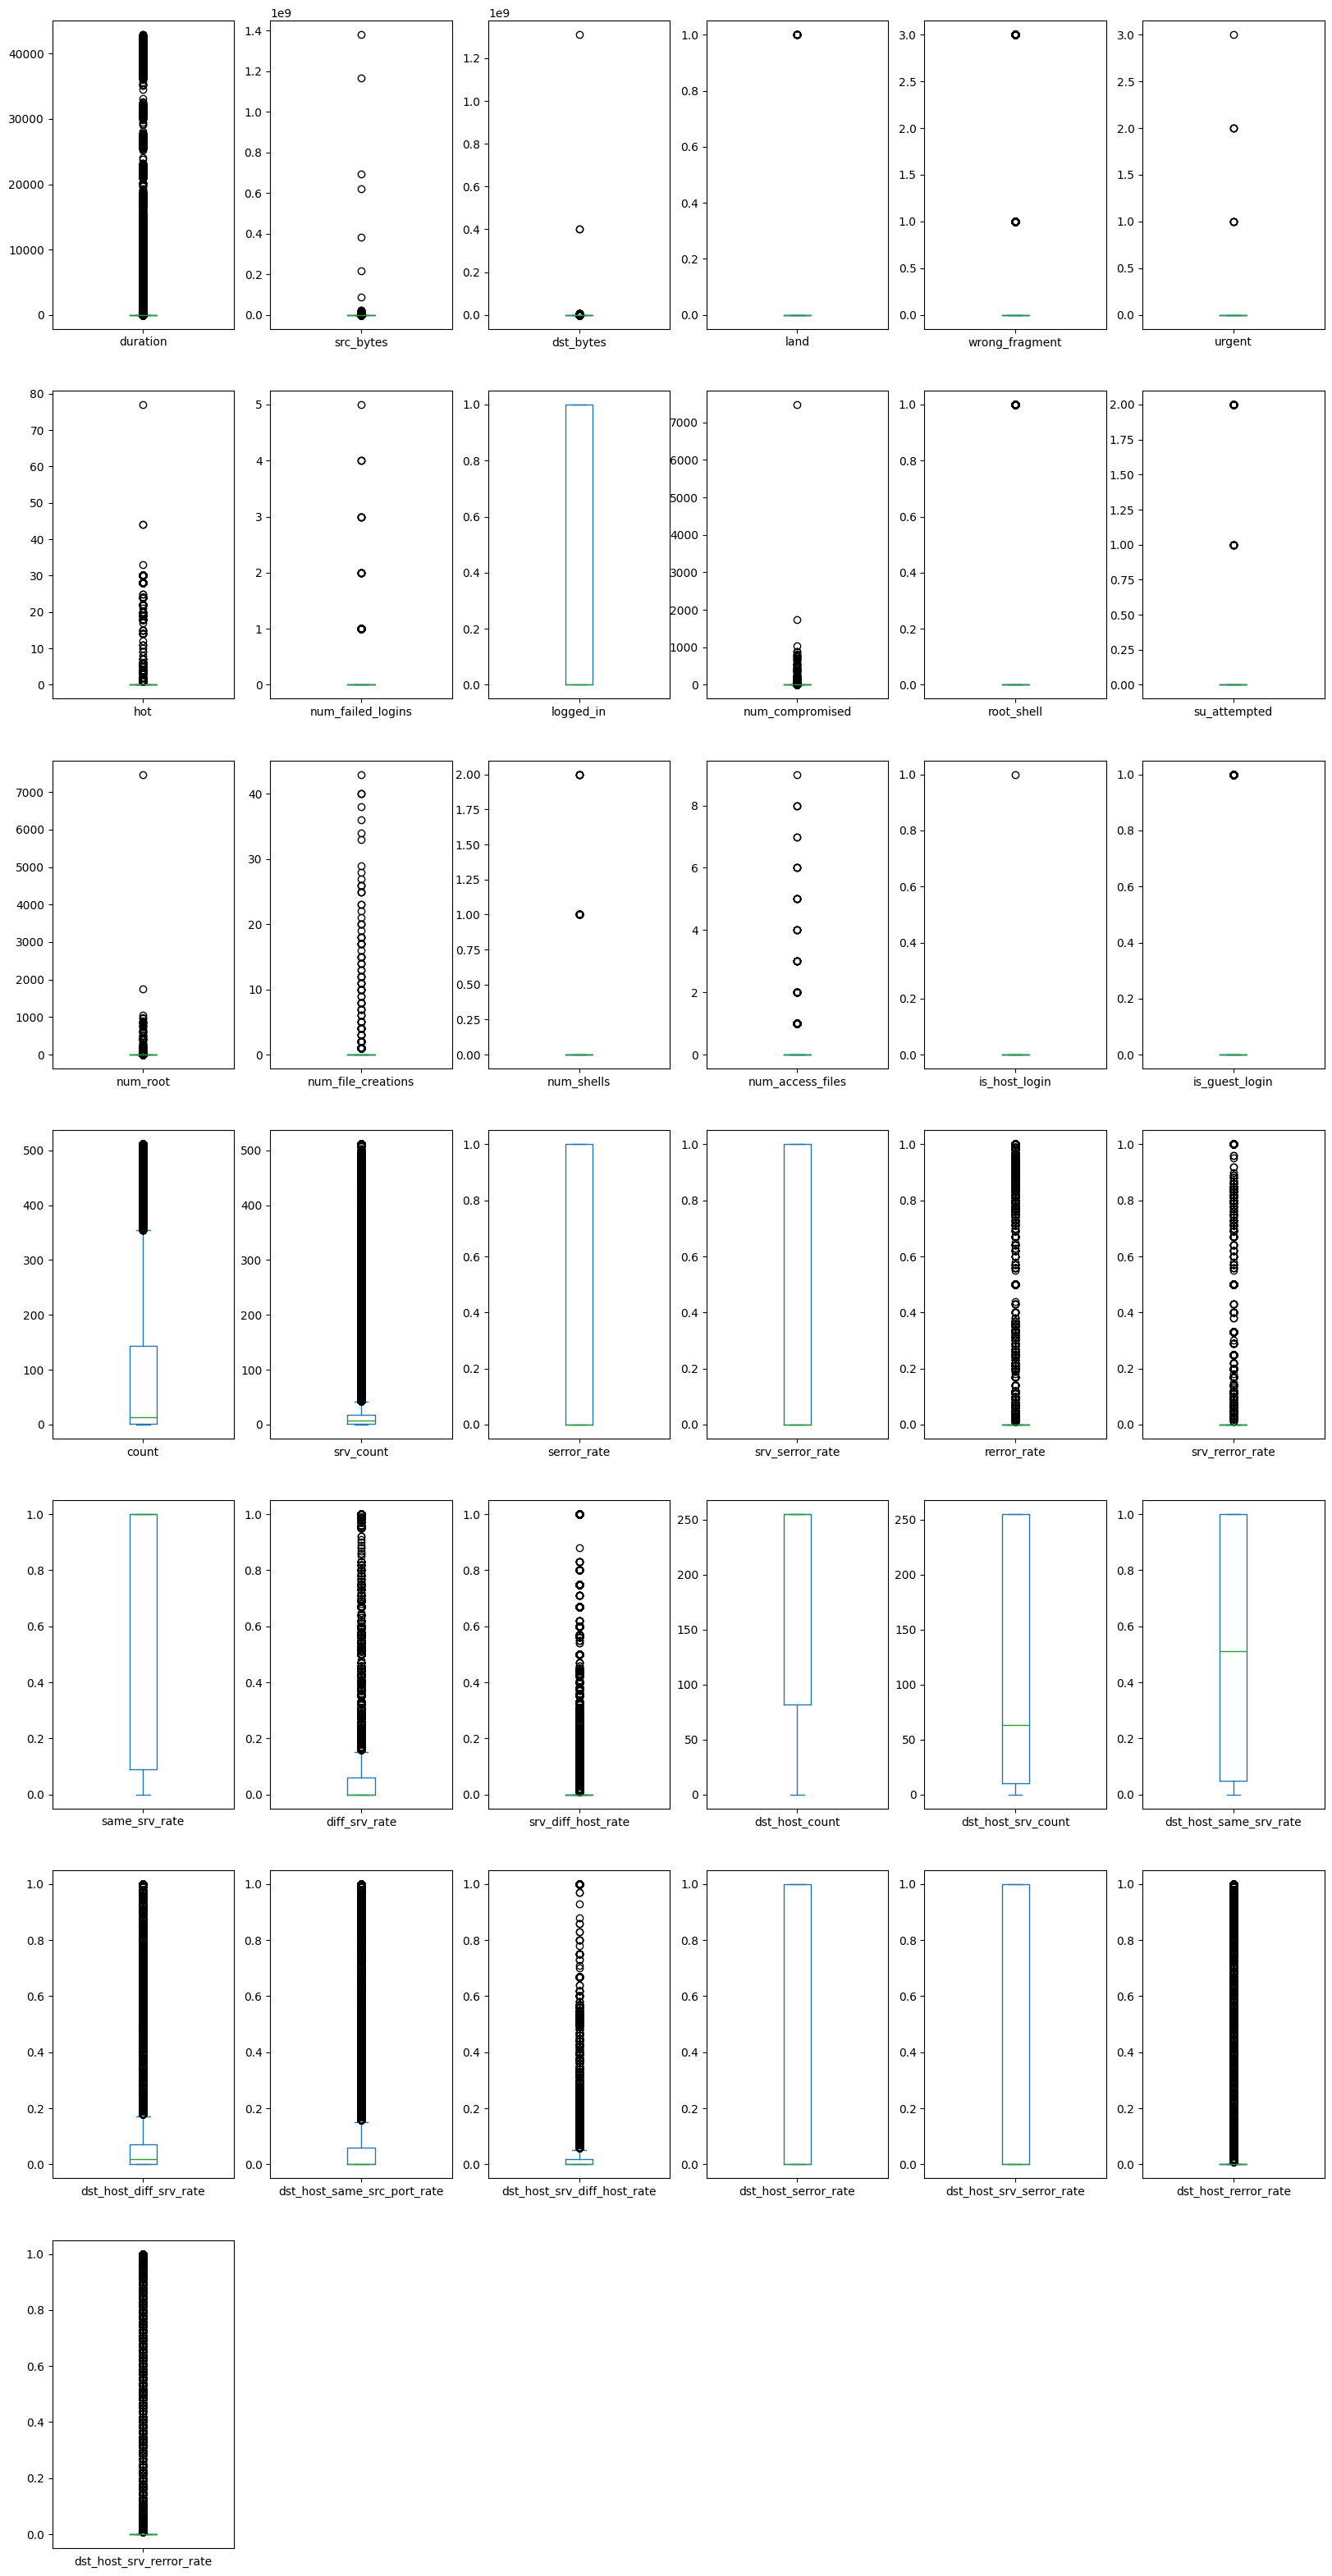

In [39]:
#Visualisation du trainset
train.plot(kind='box', subplots=True, layout=(7, 6), figsize=(20, 40))
plt.show()


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
III. Data Preparation</p><br>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Data Cleaning</p><br>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Duplicate values</p><br>

In [40]:
# Vérifier les lignes dupliquées dans le trainFrame
duplicates = train[train.duplicated()]

# Afficher le nombre total de lignes dupliquées
print(f"Nombre total de lignes dupliquées : {len(duplicates)}")


Nombre total de lignes dupliquées : 0


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Il est observé qu'il n'y a aucune ligne dupliquée.
    </div>


<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Missing values</p><br>

In [41]:
# Vérifier les missing values
train.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

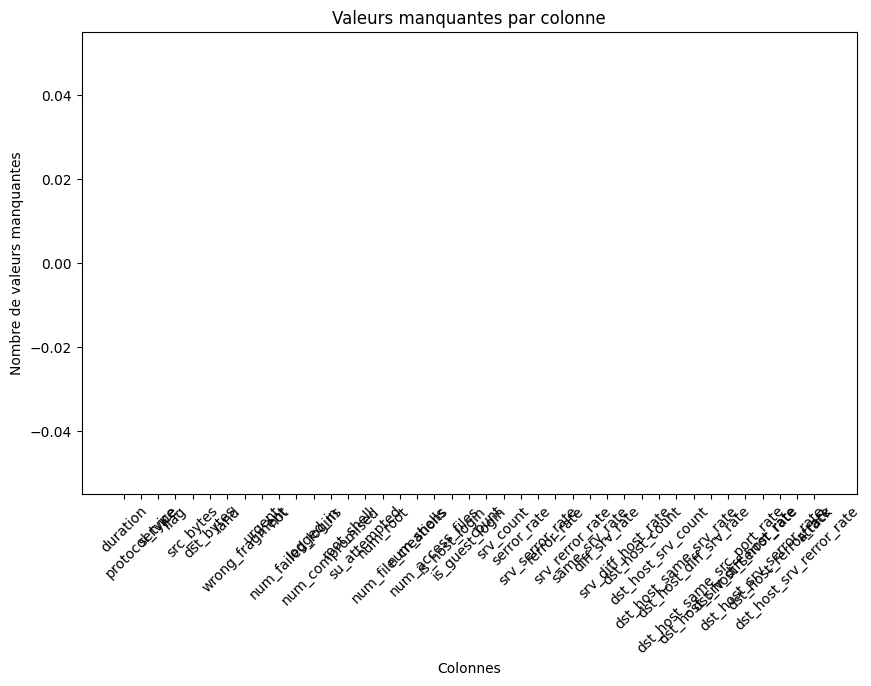

In [42]:
missing_mask = train.isnull()
missing_count = missing_mask.sum()
plt.figure(figsize=(10, 6))
plt.bar(missing_count.index, missing_count)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Valeurs manquantes par colonne')
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe x pour une meilleure lisibilité
plt.show()


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Il est observé que notre dataset ne contient aucune valeur manquante.
    </div>

In [43]:
def detect_outliers_iqr(data, threshold=1.5):
    outliers_info = {}

    for column in data.columns:
        if data[column].dtype in [int, float]:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

            if not column_outliers.empty:
                num_outliers = len(column_outliers)
                percent_outliers = (num_outliers / len(data)) * 100
                outliers_info[column] = {"outliers_df": column_outliers, "num_outliers": num_outliers, "percent_outliers": percent_outliers}

    return outliers_info



In [44]:
outliers_train = detect_outliers_iqr(train)

# Afficher les colonnes avec des valeurs aberrantes, le nombre de valeurs aberrantes, et le pourcentage de valeurs aberrantes
for column, info in outliers_train.items():
    print(f"Outliers in column '{column}': {info['num_outliers']} outliers ({info['percent_outliers']:.2f}%)")
    #print(info['outliers_df'].head())
    #print("\n")

Outliers in column 'rerror_rate': 16190 outliers (12.85%)
Outliers in column 'srv_rerror_rate': 16206 outliers (12.86%)
Outliers in column 'diff_srv_rate': 7788 outliers (6.18%)
Outliers in column 'srv_diff_host_rate': 28399 outliers (22.54%)
Outliers in column 'dst_host_diff_srv_rate': 10550 outliers (8.37%)
Outliers in column 'dst_host_same_src_port_rate': 25051 outliers (19.89%)
Outliers in column 'dst_host_srv_diff_host_rate': 11682 outliers (9.27%)
Outliers in column 'dst_host_rerror_rate': 22794 outliers (18.09%)
Outliers in column 'dst_host_srv_rerror_rate': 19357 outliers (15.37%)


In [45]:
outliers_test = detect_outliers_iqr(test)

# Afficher les colonnes avec des valeurs aberrantes, le nombre de valeurs aberrantes, et le pourcentage de valeurs aberrantes
for column, info in outliers_test.items():
    print(f"Outliers in column '{column}': {info['num_outliers']} outliers ({info['percent_outliers']:.2f}%)")
    #print(info['outliers_df'].head())
    #print("\n")

Outliers in column 'serror_rate': 3350 outliers (14.86%)
Outliers in column 'srv_serror_rate': 2913 outliers (12.92%)
Outliers in column 'rerror_rate': 5367 outliers (23.81%)
Outliers in column 'srv_rerror_rate': 5583 outliers (24.77%)
Outliers in column 'diff_srv_rate': 2062 outliers (9.15%)
Outliers in column 'srv_diff_host_rate': 4975 outliers (22.07%)
Outliers in column 'dst_host_diff_srv_rate': 2192 outliers (9.72%)
Outliers in column 'dst_host_same_src_port_rate': 4259 outliers (18.89%)
Outliers in column 'dst_host_srv_diff_host_rate': 3610 outliers (16.01%)
Outliers in column 'dst_host_serror_rate': 4618 outliers (20.49%)
Outliers in column 'dst_host_srv_serror_rate': 3628 outliers (16.09%)
Outliers in column 'dst_host_rerror_rate': 3575 outliers (15.86%)
Outliers in column 'dst_host_srv_rerror_rate': 5221 outliers (23.16%)


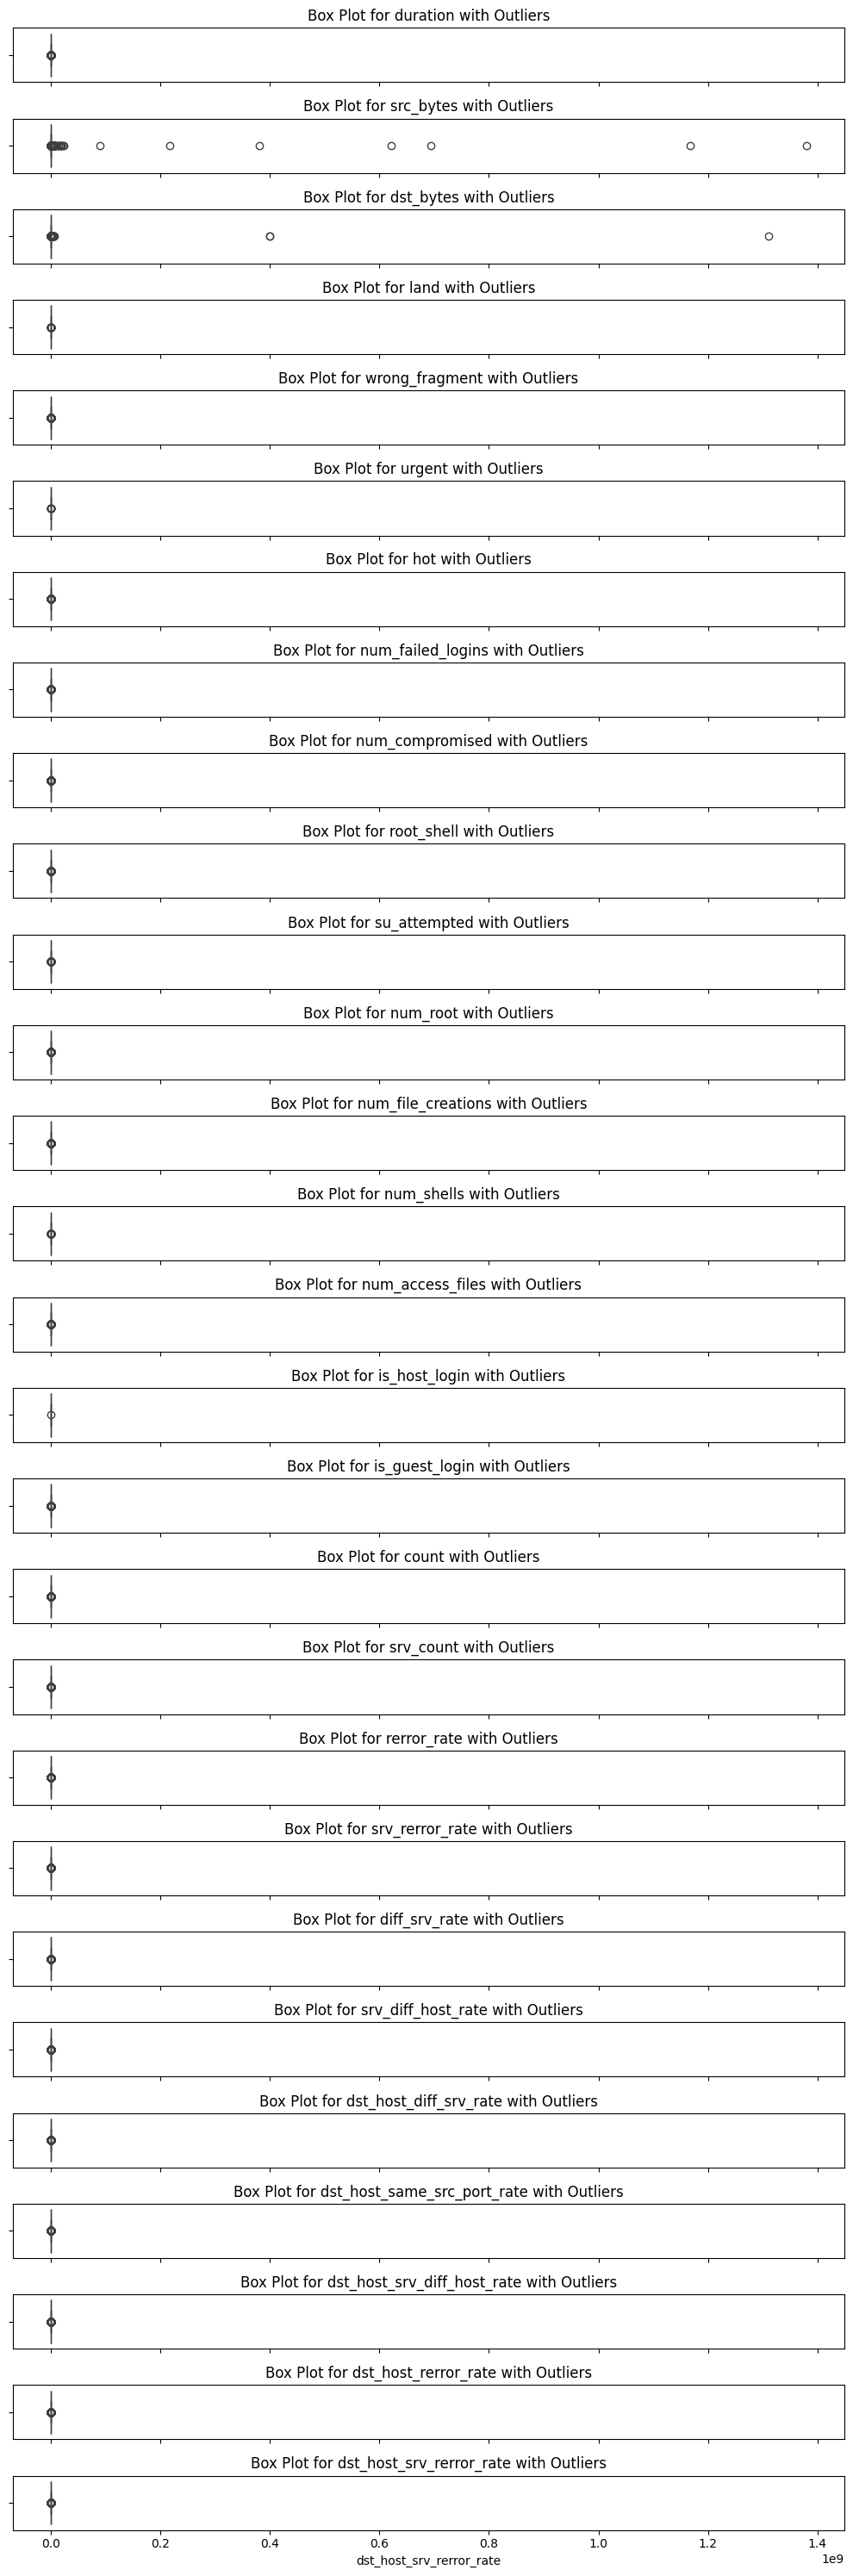

In [46]:
#Visualisation des outliers
outlier_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                    'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell',
                    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                    'num_access_files', 'is_host_login', 'is_guest_login', 'count',
                    'srv_count', 'rerror_rate', 'srv_rerror_rate', 'diff_srv_rate',
                    'srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                    'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
                    ]

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(outlier_columns), ncols=1, figsize=(10, 30), sharex=True)

# Plot box plots for each column
for i, col in enumerate(outlier_columns):
    sns.boxplot(x=train[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col} with Outliers')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [47]:
#Remplacement des outliers
def replace_outliers_with_quantile(data, threshold=0.99):
    cleaned_data = data.copy()

    # Storage des outliers before and after
    outliers_count = {'Before': {}, 'After': {}}

    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            # Determiner la valeur du quantile
            quantile_value = data[column].quantile(threshold)

            # Compter les outliers avant replacement
            outlier_indices_before = data[column] > quantile_value
            outliers_count['Before'][column] = outlier_indices_before.sum()

            if outlier_indices_before.any():
                cleaned_data[column] = np.where(outlier_indices_before, quantile_value, cleaned_data[column])

            # Compter les outliers après replacement
            outlier_indices_after = cleaned_data[column] > quantile_value
            outliers_count['After'][column] = outlier_indices_after.sum()

    return cleaned_data, outliers_count

before_replacement = train.copy()



In [48]:
#Application de la fonction des outliers
train_after, outliers_count = replace_outliers_with_quantile(train)
#Affichage des outliers before and after
print("Outliers Count:")
print(pd.DataFrame(outliers_count))

Outliers Count:
                             Before  After
duration                       1260      0
src_bytes                       588      0
dst_bytes                      1258      0
land                             25      0
wrong_fragment                 1090      0
urgent                            9      0
hot                            1211      0
num_failed_logins               122      0
logged_in                         0      0
num_compromised                 310      0
root_shell                      169      0
su_attempted                     80      0
num_root                        649      0
num_file_creations              287      0
num_shells                       47      0
num_access_files                371      0
is_host_login                     1      0
is_guest_login                 1187      0
count                             0      0
srv_count                      1259      0
serror_rate                       0      0
srv_serror_rate                   0   

In [49]:
#Application de la fonction des outliers
train_after, outliers_count = replace_outliers_with_quantile(test)


#Affichage des outliers before and after
print("Outliers Count:")
print(pd.DataFrame(outliers_count))

Outliers Count:
                             Before  After
duration                        226      0
src_bytes                        11      0
dst_bytes                       226      0
land                              7      0
wrong_fragment                  100      0
urgent                           10      0
hot                              71      0
num_failed_logins                 5      0
logged_in                         0      0
num_compromised                  44      0
root_shell                       55      0
su_attempted                      4      0
num_root                         48      0
num_file_creations               42      0
num_shells                       19      0
num_access_files                 72      0
is_host_login                    11      0
is_guest_login                    0      0
count                             0      0
srv_count                         0      0
serror_rate                       0      0
srv_serror_rate                   0   

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
VI. Data transformation </p><br>


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
Target</p><br>

In [50]:
def change_label(train):
  train.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  train.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  train.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  train.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(train)
change_label(test)

In [51]:
train['attack'].value_counts()
test['attack'].value_counts()

attack
normal    9711
Dos       7459
R2L       2885
Probe     2421
U2R         67
Name: count, dtype: int64

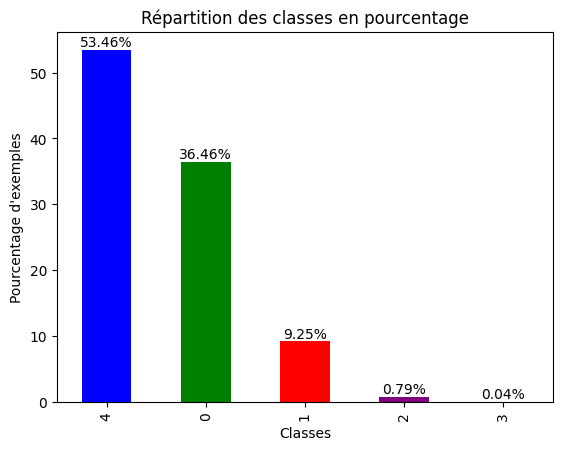

In [66]:
class_counts = train['attack'].value_counts()
class_percentages = (class_counts / len(train)) * 100
colors = ['blue',  'green', 'red', 'purple']
ax = class_percentages.plot(kind='bar', color=colors)
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>
    Regroupement des valeur de la column target attaque en catégories 'Dos', 'R2L', 'Probe', 'U2R'
    </div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Encodage one-hot</p><br>

In [53]:
train = pd.get_dummies(train, columns=['protocol_type'], prefix='protocol')
train = pd.get_dummies(train, columns=['flag'], prefix='flag')
train = pd.get_dummies(train, columns=['service'], prefix='serv')
bool_columns = train.select_dtypes(include='bool').columns
train[bool_columns] = train[bool_columns].astype(int)


In [54]:
test = pd.get_dummies(test, columns=['protocol_type'], prefix='protocol')
test = pd.get_dummies(test, columns=['flag'], prefix='flag')
test = pd.get_dummies(test, columns=['service'], prefix='serv')
bool_columns = test.select_dtypes(include='bool').columns
test[bool_columns] = test[bool_columns].astype(int)


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
2.Label Encoding</p><br>

In [55]:
le = LabelEncoder()
train['attack']=le.fit_transform(train['attack'])
test['attack']=le.fit_transform(test['attack'])

In [56]:
train.head(50)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serv_telnet,serv_tftp_u,serv_tim_i,serv_time,serv_urh_i,serv_urp_i,serv_uucp,serv_uucp_path,serv_vmnet,serv_whois
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
3.Standardisation</p><br>

In [57]:
std_scaler = StandardScaler()
colonnes_a_normaliser = [
    'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'num_compromised', 'num_root',
    'num_file_creations', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count'
    ]
train[colonnes_a_normaliser] = std_scaler.fit_transform(train[colonnes_a_normaliser])
test[colonnes_a_normaliser] = std_scaler.fit_transform(test[colonnes_a_normaliser])

In [58]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,4.083709e-17,1.000004,-0.110250,-0.110250,-0.110250,-0.110250,16.364218
src_bytes,125972.0,-9.024770e-19,1.000004,-0.007762,-0.007762,-0.007755,-0.007715,235.066520
dst_bytes,125972.0,-1.692144e-18,1.000004,-0.004919,-0.004919,-0.004919,-0.004790,325.747313
land,125972.0,1.984568e-04,0.014086,0.000000,0.000000,0.000000,0.000000,1.000000
wrong_fragment,125972.0,2.171585e-18,1.000004,-0.089487,-0.089487,-0.089487,-0.089487,11.743433
...,...,...,...,...,...,...,...,...
serv_urp_i,125972.0,4.778840e-03,0.068964,0.000000,0.000000,0.000000,0.000000,1.000000
serv_uucp,125972.0,6.191852e-03,0.078445,0.000000,0.000000,0.000000,0.000000,1.000000
serv_uucp_path,125972.0,5.469469e-03,0.073754,0.000000,0.000000,0.000000,0.000000,1.000000
serv_vmnet,125972.0,4.897914e-03,0.069814,0.000000,0.000000,0.000000,0.000000,1.000000


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
3.FEATURE SELECTION</p><br>

In [59]:
X_train = train.drop('attack', axis=1)  # Features
Y_train= train['attack']  # Target variable
X_test = test.drop('attack', axis=1)  # Features
Y_test= test['attack']  # Target variable


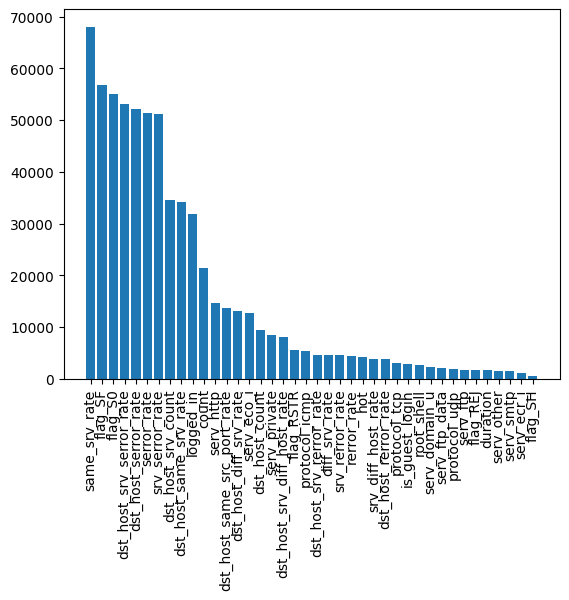

In [60]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=50)
X_train_selected = selector.fit_transform(X_train, Y_train)
selected_features = X_train.columns[selector.get_support()]
#print("Selected Features:", selected_features)
feature_scores = list(zip(selector.scores_, X_train.columns))
sorted_feature_scores = sorted(feature_scores, reverse=True)
num_list = []
col_list = []
for i in range(40):
    num_list.append((sorted_feature_scores[i])[0])
    col_list.append((sorted_feature_scores[i])[1])


plt.bar(col_list, num_list)
plt.xticks(rotation=90)
plt.show()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [75]:
X_test_selected = X_test[selected_features]

In [61]:
X_train_selected.shape

(125972, 60)

In [62]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
colonnes_pertinentes = mutual_info.sort_values(ascending=False).index

n_caracteristiques_pertinentes = 60 
X_train_pertinent = X_train[colonnes_pertinentes[:n_caracteristiques_pertinentes]]


In [72]:
X_test_pertinent = X_test[colonnes_pertinentes[:n_caracteristiques_pertinentes]]

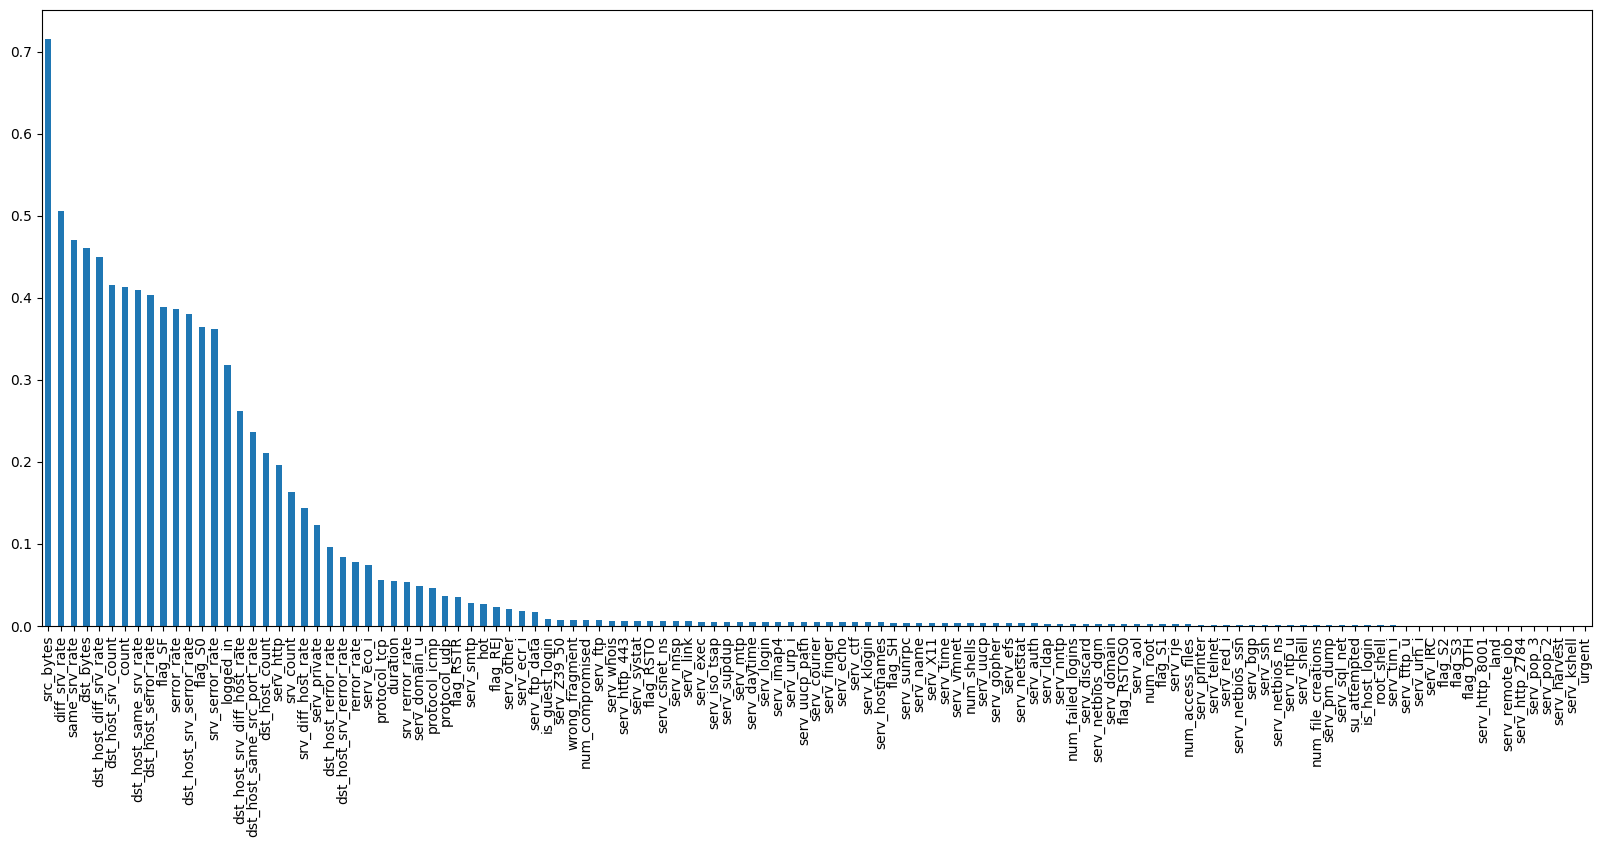

In [63]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)); 


In [64]:
X_train_pertinent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_bytes                    125972 non-null  float64
 1   diff_srv_rate                125972 non-null  float64
 2   same_srv_rate                125972 non-null  float64
 3   dst_bytes                    125972 non-null  float64
 4   dst_host_diff_srv_rate       125972 non-null  float64
 5   dst_host_srv_count           125972 non-null  float64
 6   count                        125972 non-null  float64
 7   dst_host_same_srv_rate       125972 non-null  float64
 8   dst_host_serror_rate         125972 non-null  float64
 9   flag_SF                      125972 non-null  int32  
 10  serror_rate                  125972 non-null  float64
 11  dst_host_srv_serror_rate     125972 non-null  float64
 12  flag_S0                      125972 non-null  int32  
 13 

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
IIV. Modélisation des données</p><br>

In [65]:
# # Définir les hyperparamètres que vous souhaitez ajuster pour KNN
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

# # Créer le modèle KNN
# knn_classifier = KNeighborsClassifier()

# # Utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres
# grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
# grid_search_knn.fit(X_train_pertinent, Y_train)

# # Afficher les meilleurs hyperparamètres pour KNN
# best_params_knn = grid_search_knn.best_params_
# print("Best Hyperparameters for KNN:", best_params_knn)

In [69]:
n_neighbors = list(range(1,10))
p = [1, 2]
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train_selected, Y_train) 
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 1


In [79]:
knn = KNeighborsClassifier(1,p=1)
knn_model = knn.fit(X_train_selected, Y_train)
Y_test = knn_model.predict(X_test_selected)

In [77]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00
